## Pytorch workflow fundamentals

In [288]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [289]:
torch.__version__

'2.0.1+cu118'

In [290]:
# linear regression formula to make a linear dataset

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)

y = weight * X + bias



In [291]:
# splitting data in training and testing datasets

train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

print(X_train.shape, y_train.shape)

torch.Size([40, 1]) torch.Size([40, 1])


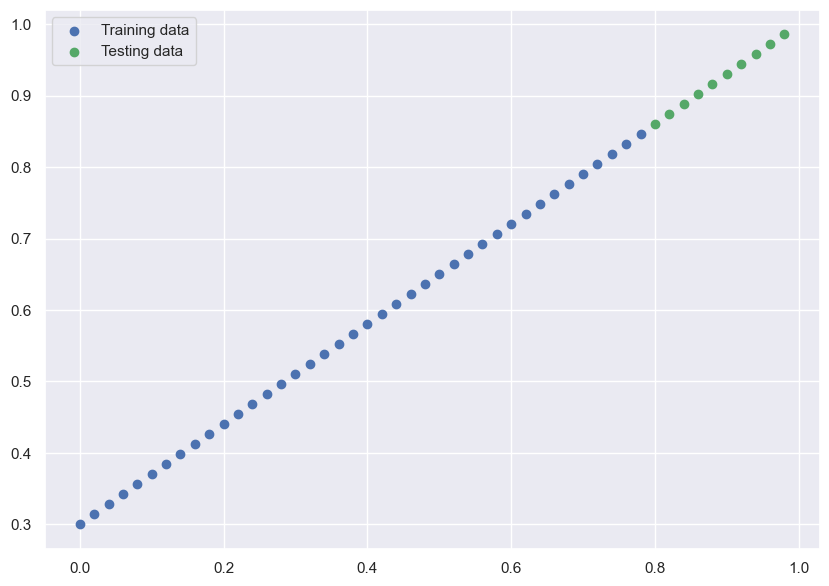

In [292]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', label='Training data')
    plt.scatter(test_data, test_labels, c='g', label='Testing data')
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', label='Predictions')
    plt.legend()
    plt.show()

plot_predictions()

In [293]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.weights = nn.Parameter(torch.randn(1, 
                                    requires_grad=True,
                                    dtype=torch.float)
                                    )
        self.bias = nn.Parameter(torch.randn(1, 
                                    requires_grad=True,
                                    dtype=torch.float)
                                    )
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [294]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [295]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

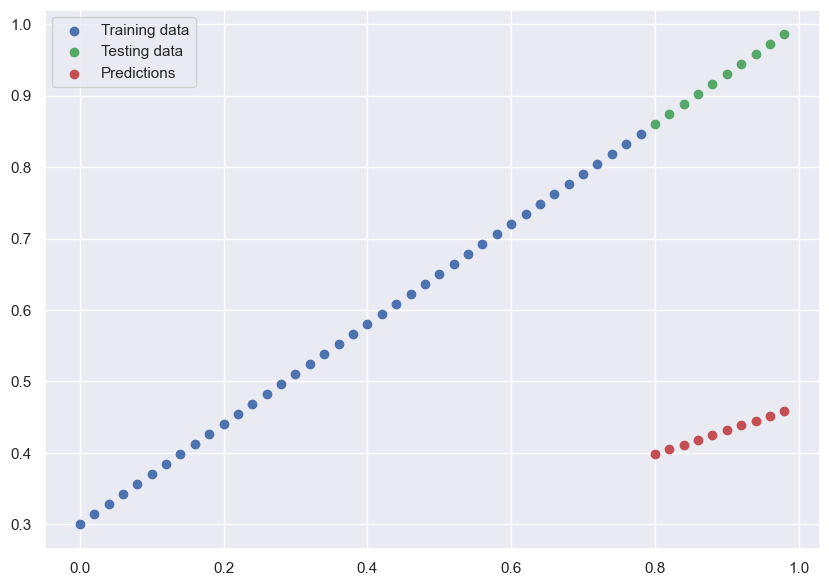

In [296]:
with torch.inference_mode():
    y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)

### Training the model


In [297]:
# get a loss function
loss_fn = nn.L1Loss()
loss_fn(y_test, y_preds)

tensor(0.4945)

In [298]:
# get a optimizer
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.01)

In [299]:
# Training loop

epochs = 200

# Experiment tracking
epoch_count = []
train_loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_0.train() # set all parameters with requires grad to true
    
    # 1. forward pass
    train_pred = model_0(X_train) 
    
    # 2. get loss
    train_loss = loss_fn(train_pred, y_train)

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. backprop
    train_loss.backward()

    # 5. optimizer step
    optimizer.step()

    if epoch % 10 == 0:

        # test metrics 
        model_0.eval() # turns off settings not needed for evaluation or testing
        with torch.inference_mode():
            test_pred = model_0(X_test)
            test_loss = loss_fn(test_pred, y_test)

        epoch_count.append(epoch)
        train_loss_values.append(train_loss)
        test_loss_values.append(test_loss)

        print(f'Epoch {epoch+1}: Loss {loss.item():.4f}, Test Loss {test_loss.item():.4f}')

Epoch 1: Loss 0.3129, Test Loss 0.4756
Epoch 11: Loss 0.3129, Test Loss 0.2866
Epoch 21: Loss 0.3129, Test Loss 0.0987
Epoch 31: Loss 0.3129, Test Loss 0.0055
Epoch 41: Loss 0.3129, Test Loss 0.0635
Epoch 51: Loss 0.3129, Test Loss 0.0410
Epoch 61: Loss 0.3129, Test Loss 0.0133
Epoch 71: Loss 0.3129, Test Loss 0.0023
Epoch 81: Loss 0.3129, Test Loss 0.0020
Epoch 91: Loss 0.3129, Test Loss 0.0038
Epoch 101: Loss 0.3129, Test Loss 0.0018
Epoch 111: Loss 0.3129, Test Loss 0.0010
Epoch 121: Loss 0.3129, Test Loss 0.0007
Epoch 131: Loss 0.3129, Test Loss 0.0054
Epoch 141: Loss 0.3129, Test Loss 0.0005
Epoch 151: Loss 0.3129, Test Loss 0.0047
Epoch 161: Loss 0.3129, Test Loss 0.0043
Epoch 171: Loss 0.3129, Test Loss 0.0002
Epoch 181: Loss 0.3129, Test Loss 0.0009
Epoch 191: Loss 0.3129, Test Loss 0.0018


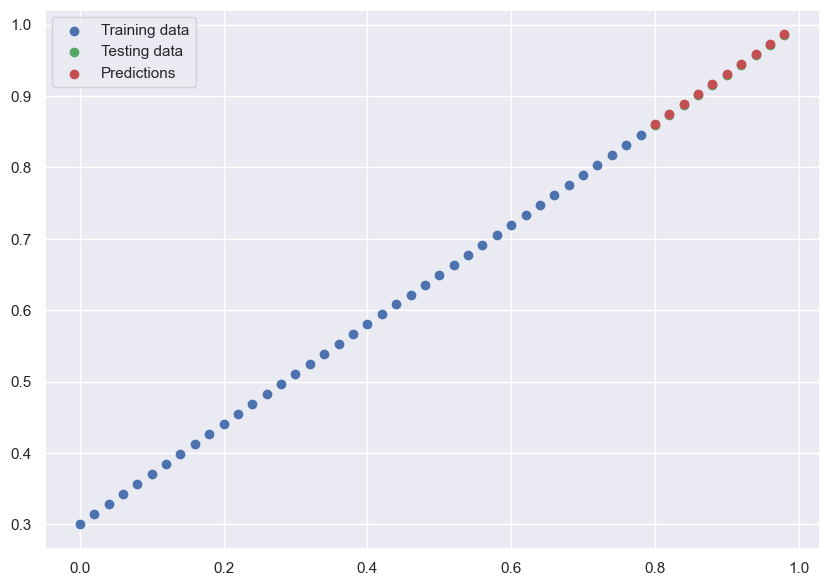

tensor(0.0006)


In [300]:
with torch.inference_mode():
    y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)
print(loss_fn(y_test, y_preds))

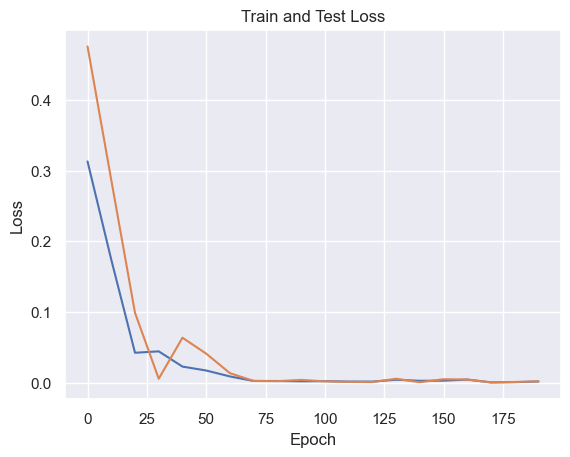

In [301]:
plt.plot(epoch_count, torch.tensor(train_loss_values).cpu().numpy(), label='Train')
plt.plot(epoch_count, torch.tensor(test_loss_values).cpu().numpy(), label='Test')
plt.legend
plt.title("Train and Test Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

In [302]:
# save the model
from pathlib import Path

MODEL_DIR = Path("models")
MODEL_DIR.mkdir(parents=True, exist_ok=True)

MODEL_NAME = Path("1_linear_regression_0.pth")

MODEL_PATH = MODEL_DIR / MODEL_NAME
MODEL_PATH

print(f"Saving model to {MODEL_PATH}")
torch.save(model_0.state_dict(), f=MODEL_PATH)

Saving model to models\1_linear_regression_0.pth


In [303]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(MODEL_PATH))

<All keys matched successfully>

In [304]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.7004])), ('bias', tensor([0.3002]))])

In [305]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_predictions = loaded_model_0(X_test)

loaded_predictions == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Putting everything together

In [306]:
### Putting it all together

import torch
from torch import nn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

torch.__version__

'2.0.1+cu118'

In [307]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device :{device}")

Using device :cuda


In [308]:
# linear regression formula to make a linear dataset

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias


# splitting data in training and testing datasets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

print(X_train.shape, X_test.shape)

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


torch.Size([40, 1]) torch.Size([10, 1])


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

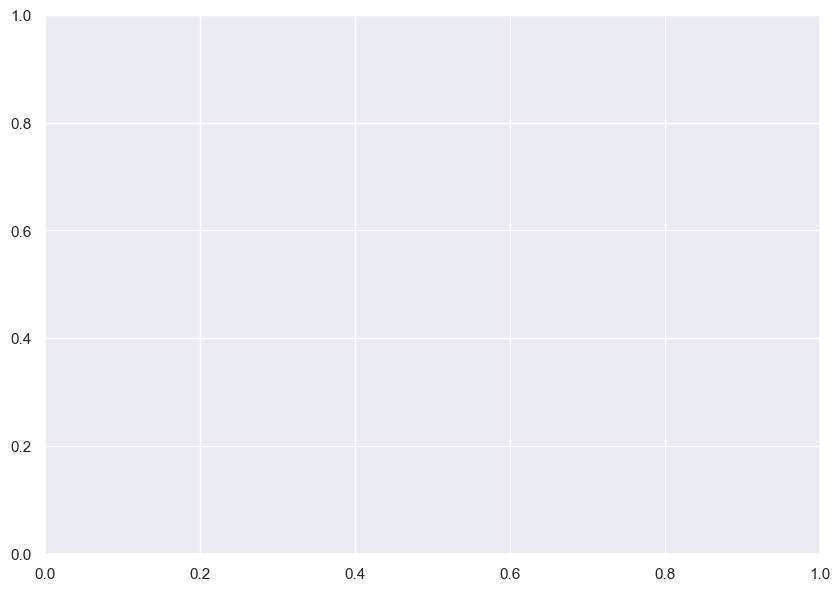

In [309]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', label='Training data')
    plt.scatter(test_data, test_labels, c='g', label='Testing data')
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', label='Predictions')
    plt.legend()
    plt.show()

plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)

In [310]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super(LinearRegressionModelV2, self).__init__()

        self.linear = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear(x)

torch.manual_seed(42)
model_2 = LinearRegressionModelV2()
model_2.state_dict()

model_2.to(device)

LinearRegressionModelV2(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

### Training

In [311]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.01)

torch.manual_seed(42)
epochs = 200

epoch_count = []
train_loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_2.train()
    train_pred = model_2(X_train)
    train_loss = loss_fn(train_pred, y_train)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        model_2.eval()
        with torch.inference_mode():
            test_pred = model_2(X_test)
            test_loss = loss_fn(test_pred, y_test)
        epoch_count.append(epoch)
        train_loss_values.append(train_loss)
        test_loss_values.append(test_loss)
        print(f'Epoch {epoch}: Loss {loss.item():.4f}, Test Loss {test_loss.item():.4f}')

Epoch 0: Loss 0.3129, Test Loss 0.5685
Epoch 10: Loss 0.3129, Test Loss 0.3795
Epoch 20: Loss 0.3129, Test Loss 0.1905
Epoch 30: Loss 0.3129, Test Loss 0.0123
Epoch 40: Loss 0.3129, Test Loss 0.1595
Epoch 50: Loss 0.3129, Test Loss 0.1946
Epoch 60: Loss 0.3129, Test Loss 0.1420
Epoch 70: Loss 0.3129, Test Loss 0.0821
Epoch 80: Loss 0.3129, Test Loss 0.0650
Epoch 90: Loss 0.3129, Test Loss 0.0593
Epoch 100: Loss 0.3129, Test Loss 0.0290
Epoch 110: Loss 0.3129, Test Loss 0.0085
Epoch 120: Loss 0.3129, Test Loss 0.0098
Epoch 130: Loss 0.3129, Test Loss 0.0004
Epoch 140: Loss 0.3129, Test Loss 0.0006
Epoch 150: Loss 0.3129, Test Loss 0.0013
Epoch 160: Loss 0.3129, Test Loss 0.0038
Epoch 170: Loss 0.3129, Test Loss 0.0022
Epoch 180: Loss 0.3129, Test Loss 0.0018
Epoch 190: Loss 0.3129, Test Loss 0.0016


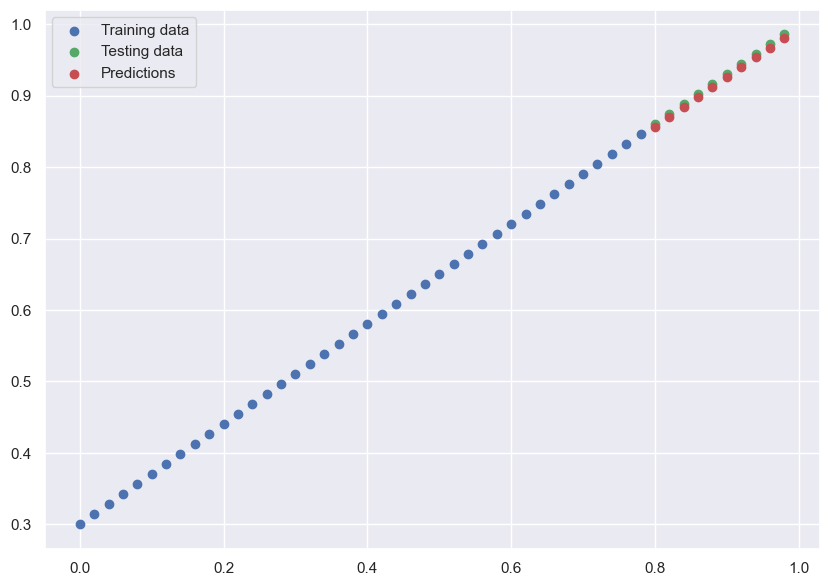

In [312]:
plot_predictions(train_data=X_train.cpu().numpy(), 
                train_labels=y_train.cpu().numpy(), 
                test_data=X_test.cpu().numpy(), 
                test_labels=y_test.cpu().numpy(), 
                predictions=model_2(X_test).detach().cpu().numpy()) 

In [313]:
# save the model
from pathlib import Path

MODEL_DIR = Path("models")
MODEL_DIR.mkdir(parents=True, exist_ok=True)

MODEL_NAME = Path("1_linear_regression_2.pth")

MODEL_PATH = MODEL_DIR / MODEL_NAME
MODEL_PATH

print(f"Saving model to {MODEL_PATH}")
torch.save(model_2.state_dict(), f=MODEL_PATH)

Saving model to models\1_linear_regression_2.pth


In [314]:
loaded_model_2 = LinearRegressionModelV2()
loaded_model_2.load_state_dict(torch.load(MODEL_PATH))
loaded_model_2.to(device)

loaded_model_2.state_dict()

OrderedDict([('linear.weight', tensor([[0.6953]], device='cuda:0')),
             ('linear.bias', tensor([0.3000], device='cuda:0'))])

In [315]:
loaded_model_2.eval()
with torch.inference_mode():
    loaded_predictions = loaded_model_2(X_test)

loaded_predictions == test_pred

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]], device='cuda:0')

In [316]:
loaded_predictions

tensor([[0.8562],
        [0.8701],
        [0.8841],
        [0.8980],
        [0.9119],
        [0.9258],
        [0.9397],
        [0.9536],
        [0.9675],
        [0.9814]], device='cuda:0')

In [317]:
test_pred

tensor([[0.8614],
        [0.8754],
        [0.8895],
        [0.9035],
        [0.9176],
        [0.9316],
        [0.9457],
        [0.9597],
        [0.9738],
        [0.9878]], device='cuda:0')